In [1]:
# https://www.kaggle.com/competitions/hackathon-online-data-science-mini-epidemiology/submissions

In [2]:
!pip install -q kaggle
import json

data = {"username":"tunkedsaro","key":"ff3d00dc680ff94caf6f8d4d9bcd3168"}
json_data = json.dumps(data)

# Write the JSON string to a file
file_path = "/content/kaggle.json"
with open(file_path, 'w') as json_file:
    json_file.write(json_data)

!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/ #copy api key ---- depend on your directory -- my directory is .../colab/..
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle competitions download -c hackathon-online-data-science-mini-epidemiology
!unzip -q /content/hackathon-online-data-science-mini-epidemiology.zip

!pip -q install autogluon.tabular

from autogluon.tabular import TabularDataset, TabularPredictor
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
waqi786/cats-dataset                                   🐾 Cats Dataset                                6KB  2024-07-31 06:12:49           1235         24  1.0              
patricklford/global-ev-sales-2010-2024                 Global EV Sales: 2010-2024                   83KB  2024-07-19 13:40:22           2083         29  1.0              
rabieelkharoua/students-performance-dataset            📚 Students Performance Dataset 📚             66KB  2024-06-12 23:09:20          26253        525  1.0              
ihelon/coffee-sales                                    Coffee Sales                                 13KB  2024-08-01 07:55:34           9096     

In [3]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a custom RMSE metric
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def pplot(train_df,province:str):
    # province = "Bangkok"
    Songkhla_df = train_df[train_df['PROVINCE']==province]
    plt.figure(figsize=(14,7))
    for year in Songkhla_df['Year'].unique():
        yearly_data = Songkhla_df[Songkhla_df['Year'] == year]
        plt.plot(yearly_data['Week_no'], yearly_data['Count'], label=f'Year {year}')

    plt.xlabel('Week Number')
    plt.ylabel('Count')
    plt.title(f'{province}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
train_df  = pd.read_csv("/content/Train_set.csv")
test_df   = pd.read_csv("/content/Test_set.csv")
submit_df = pd.read_csv("/content/sample_submission.csv")

In [5]:
pvrecord = {i:0 for i in list(train_df['PROVINCE'].unique())}

<hr>

# Bangkok

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_191205"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.17 GB / 12.67 GB (88.2%)
Disk Space Avail:   76.68 GB / 107.72 GB (71.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 38.8142
[2000]	valid_set's rmse: 37.4514
[3000]	valid_set's rmse: 37.4715


	-37.1831	 = Validation score   (-root_mean_squared_error)
	5.59s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 32.1916
[2000]	valid_set's rmse: 30.9499
[3000]	valid_set's rmse: 29.9471
[4000]	valid_set's rmse: 29.3834
[5000]	valid_set's rmse: 29.0686
[6000]	valid_set's rmse: 28.9755
[7000]	valid_set's rmse: 29.0519


	-28.93	 = Validation score   (-root_mean_squared_error)
	8.53s	 = Training   runtime
	0.17s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-25.6752	 = Validation score   (-root_mean_squared_error)
	2.08s	 = Training   runtime
	0.16s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesMSE ...
	-25.6129	 = Validation score   (-root_mean_squared_error)
	2.98s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-32.9958	 = Validation score   (-root_mean_squared_error)
	3.97s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-25.7743	 = Validation score   (-root_mean_squared_error)
	1.34s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-22.9941	 = Validation score   (-root_mean_squared_error)
	12.43s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge ...
	-28.5942	 = Validation score   (-root_mean_squared_error)
	0.79s	 = Tr

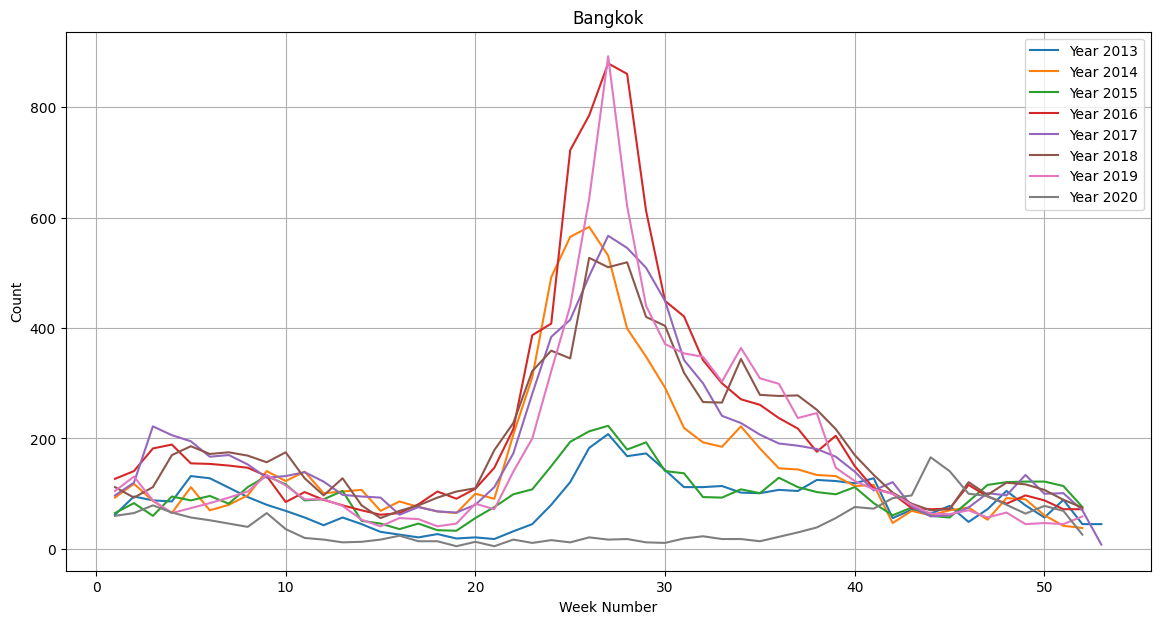


RMSE: 21.6155148122598


,model,score_test,root_mean_squared_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist,-15.473326,-15.473326,-27.486195,root_mean_squared_error,0.047800,0.023787,0.010360,0.047800,0.023787,0.010360,1,True,2
1,KNeighborsUnif,-16.275229,-16.275229,-28.409287,root_mean_squared_error,0.050619,0.017640,7.760915,0.050619,0.017640,7.760915,1,True,1
2,LightGBMLarge,-17.501636,-17.501636,-28.594192,root_mean_squared_error,0.027136,0.002215,0.787661,0.027136,0.002215,0.787661,1,True,10
3,NeuralNetTorch,-17.891524,-17.891524,-22.994124,root_mean_squared_error,0.042203,0.011986,12.433099,0.042203,0.011986,12.433099,1,True,9
4,RandomForestMSE,-18.219821,-18.219821,-25.675177,root_mean_squared_error,0.170173,0.162419,2.075594,0.170173,0.162419,2.075594,1,True,5
5,ExtraTreesMSE,-20.130535,-20.130535,-25.612906,root_mean_squared_error,0.188098,0.146438,2.978091,0.188098,0.146438,2.978091,1,True,6
6,WeightedEnsemble_L2,-21.615515,-21.615515,-21.745498,root_mean_squared_error,0.400077,0.236103,25.008427,0.005191,0.000846,0.065312,2,True,11
7,XGBoost,-33.056450,-33.056450,-25.774299,root_mean_squared_error,0.055693,0.012190,1.341752,0.055693,0.012190,1.341752,1,True,8
8,LightGBM,-40.309075,-40.309075,-28.929999,root_mean_squared_error,0.243783,0.168242,8.534090,0.243783,0.168242,8.534090,1,True,4
9,LightGBMXT,-40.614224,-40.614224,-37.183092,root_mean_squared_error,0.100139,0.079821,5.585517,0.100139,0.079821,5.585517,1,True,3


In [6]:
province = "Bangkok"
province_df = train_df[train_df['PROVINCE']==province]
# Split data into train and validation based on the years
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()

# Feature engineering: Create lag features and moving averages
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)

province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()

# Fill NaN values created by lag features
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)

# Select features and target for training
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']

# Select features and target for validation
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']

# Prepare the data for AutoGluon
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val

# Train the AutoGluon model
Samut_Prakan = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)

# Evaluate the model on the validation data
leaderboard = Samut_Prakan.leaderboard(val_data, extra_metrics=['rmse'])

# Get predictions on validation data
y_pred = Samut_Prakan.predict(X_val)

# Calculate and print RMSE on validation data
rmse_value = rmse(y_val, y_pred)

pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
# Update the RMSE value for the province
pvrecord[province] = rmse_value
leaderboard

<hr>

## Samut Prakan

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_191258"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.64 GB / 12.67 GB (84.0%)
Disk Space Avail:   76.66 GB / 107.72 GB (71.2%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 7.2243
[2000]	valid_set's rmse: 6.62413
[3000]	valid_set's rmse: 6.34701
[4000]	valid_set's rmse: 6.2017
[5000]	valid_set's rmse: 6.09723
[6000]	valid_set's rmse: 6.00527
[7000]	valid_set's rmse: 5.95087
[8000]	valid_set's rmse: 5.89061
[9000]	valid_set's rmse: 5.85235
[10000]	valid_set's rmse: 5.84428


	-5.8358	 = Validation score   (-root_mean_squared_error)
	8.06s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: LightGBM ...
	-6.4473	 = Validation score   (-root_mean_squared_error)
	1.49s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-6.8749	 = Validation score   (-root_mean_squared_error)
	2.2s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesMSE ...
	-6.756	 = Validation score   (-root_mean_squared_error)
	1.9s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-6.4136	 = Validation score   (-root_mean_squared_error)
	4.18s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: XGBoost ...
	-6.3158	 = Validation score   (-root_mean_squared_error)
	2.26s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-5.2393	 = Validation score   (-root_mean_squared_error)
	23.85s	 = Training   runt

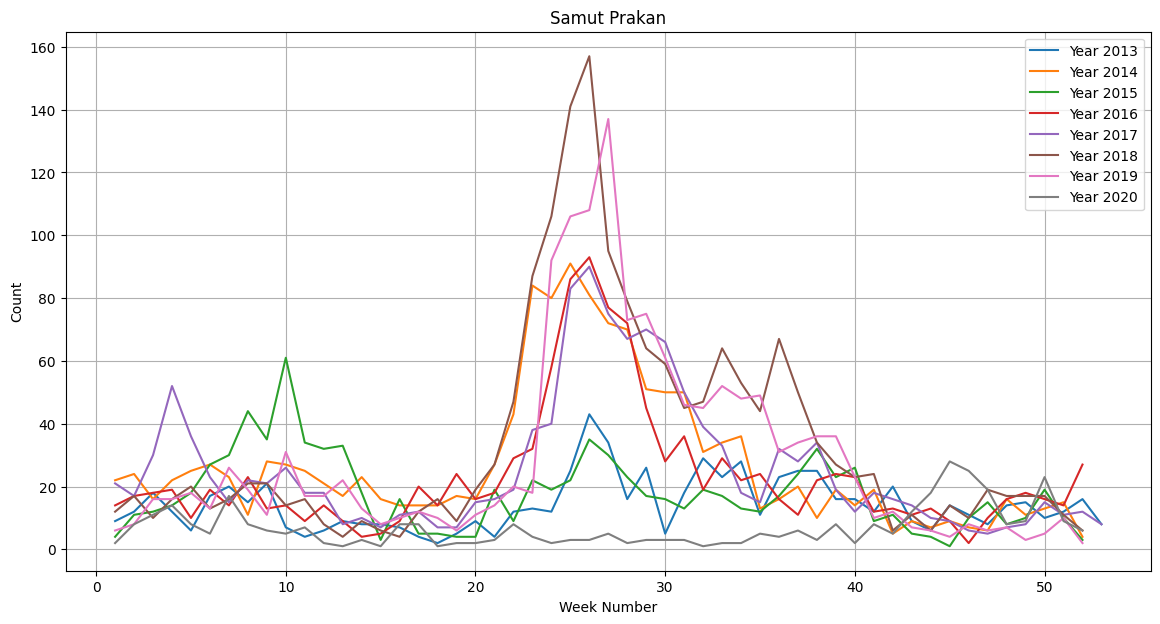


RMSE: 3.3944466442966936


,model,score_test,root_mean_squared_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,-1.800281,-1.800281,-5.239304,root_mean_squared_error,0.023837,0.032597,23.847473,0.023837,0.032597,23.847473,1,True,9
1,XGBoost,-3.035099,-3.035099,-6.315822,root_mean_squared_error,0.070501,0.015084,2.261692,0.070501,0.015084,2.261692,1,True,8
2,WeightedEnsemble_L2,-3.394447,-3.394447,-4.721723,root_mean_squared_error,1.368957,0.250993,37.721450,0.008703,0.003449,0.145155,2,True,11
3,RandomForestMSE,-3.522516,-3.522516,-6.874888,root_mean_squared_error,0.241991,0.147580,2.200414,0.241991,0.147580,2.200414,1,True,5
4,ExtraTreesMSE,-3.757529,-3.757529,-6.756008,root_mean_squared_error,0.249388,0.153617,1.899887,0.249388,0.153617,1.899887,1,True,6
5,LightGBMLarge,-4.297267,-4.297267,-6.471396,root_mean_squared_error,0.034848,0.003811,2.250866,0.034848,0.003811,2.250866,1,True,10
6,LightGBMXT,-4.972885,-4.972885,-5.835799,root_mean_squared_error,1.175703,0.146880,8.061322,1.175703,0.146880,8.061322,1,True,3
7,LightGBM,-5.597596,-5.597596,-6.447286,root_mean_squared_error,0.099413,0.010069,1.488693,0.099413,0.010069,1.488693,1,True,4
8,KNeighborsUnif,-5.794892,-5.794892,-9.352525,root_mean_squared_error,0.034713,0.051654,0.017385,0.034713,0.051654,0.017385,1,True,1
9,KNeighborsDist,-5.807938,-5.807938,-9.164877,root_mean_squared_error,0.046960,0.063038,0.012725,0.046960,0.063038,0.012725,1,True,2


In [7]:
province = "Samut Prakan"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Samut_Prakan = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Samut_Prakan.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Samut_Prakan.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Nonthaburi

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_191353"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.13 GB / 12.67 GB (79.9%)
Disk Space Avail:   76.64 GB / 107.72 GB (71.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 4.20566
[2000]	valid_set's rmse: 4.01761
[3000]	valid_set's rmse: 4.00522


	-3.9973	 = Validation score   (-root_mean_squared_error)
	2.21s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: LightGBM ...
	-3.468	 = Validation score   (-root_mean_squared_error)
	0.92s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-3.8675	 = Validation score   (-root_mean_squared_error)
	1.81s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesMSE ...
	-3.807	 = Validation score   (-root_mean_squared_error)
	2.73s	 = Training   runtime
	0.19s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-3.4807	 = Validation score   (-root_mean_squared_error)
	2.78s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: XGBoost ...
	-3.6296	 = Validation score   (-root_mean_squared_error)
	1.11s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-3.3416	 = Validation score   (-root_mean_squared_error)
	15.49s	 = Training   runt

[1000]	valid_set's rmse: 3.74918
[2000]	valid_set's rmse: 3.7479


	-3.7474	 = Validation score   (-root_mean_squared_error)
	4.16s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetFastAI': 0.391, 'LightGBM': 0.348, 'NeuralNetTorch': 0.261}
	-2.884	 = Validation score   (-root_mean_squared_error)
	0.06s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 34.71s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1562.9 rows/s (74 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240803_191353")


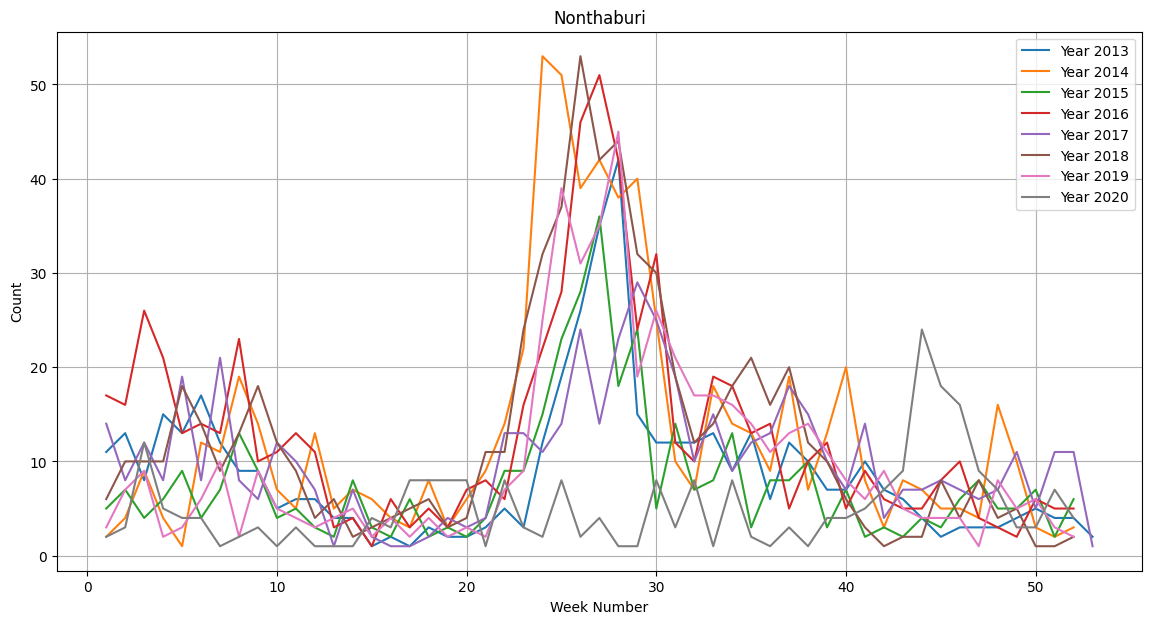


RMSE: 2.023187642429028


,model,score_test,root_mean_squared_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,-1.643399,-1.643399,-3.341557,root_mean_squared_error,0.035846,0.018961,15.489923,0.035846,0.018961,15.489923,1,True,9
1,LightGBMXT,-1.788811,-1.788811,-3.997331,root_mean_squared_error,0.133836,0.040901,2.208079,0.133836,0.040901,2.208079,1,True,3
2,LightGBMLarge,-1.970123,-1.970123,-3.747358,root_mean_squared_error,0.386228,0.053490,4.163694,0.386228,0.053490,4.163694,1,True,10
3,LightGBM,-2.005725,-2.005725,-3.467993,root_mean_squared_error,0.017350,0.002132,0.923423,0.017350,0.002132,0.923423,1,True,4
4,WeightedEnsemble_L2,-2.023188,-2.023188,-2.884004,root_mean_squared_error,0.144374,0.047347,19.248416,0.031002,0.000925,0.057943,2,True,11
5,ExtraTreesMSE,-2.170151,-2.170151,-3.807009,root_mean_squared_error,0.240471,0.194086,2.725308,0.240471,0.194086,2.725308,1,True,6
6,RandomForestMSE,-2.416611,-2.416611,-3.867503,root_mean_squared_error,0.250480,0.145804,1.808989,0.250480,0.145804,1.808989,1,True,5
7,XGBoost,-2.594912,-2.594912,-3.629600,root_mean_squared_error,0.118572,0.009176,1.105310,0.118572,0.009176,1.105310,1,True,8
8,NeuralNetFastAI,-2.945555,-2.945555,-3.480731,root_mean_squared_error,0.060176,0.025330,2.777128,0.060176,0.025330,2.777128,1,True,7
9,KNeighborsDist,-3.840091,-3.840091,-5.456909,root_mean_squared_error,0.038600,0.048515,0.034514,0.038600,0.048515,0.034514,1,True,2


In [8]:
province = "Nonthaburi"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nonthaburi = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nonthaburi.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nonthaburi.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

# Pathum Thani

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_191432"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.08 GB / 12.67 GB (79.5%)
Disk Space Avail:   76.62 GB / 107.72 GB (71.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 6.06683
[2000]	valid_set's rmse: 5.9545
[3000]	valid_set's rmse: 5.89554
[4000]	valid_set's rmse: 5.88901
[5000]	valid_set's rmse: 5.8789
[6000]	valid_set's rmse: 5.87373
[7000]	valid_set's rmse: 5.87159
[8000]	valid_set's rmse: 5.87051
[9000]	valid_set's rmse: 5.87009
[10000]	valid_set's rmse: 5.8699


	-5.8699	 = Validation score   (-root_mean_squared_error)
	12.52s	 = Training   runtime
	0.29s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'NeuralNetFastAI': 0.857, 'XGBoost': 0.143}
	-4.5856	 = Validation score   (-root_mean_squared_error)
	0.02s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 35.89s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1132.1 rows/s (74 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20240803_191432")


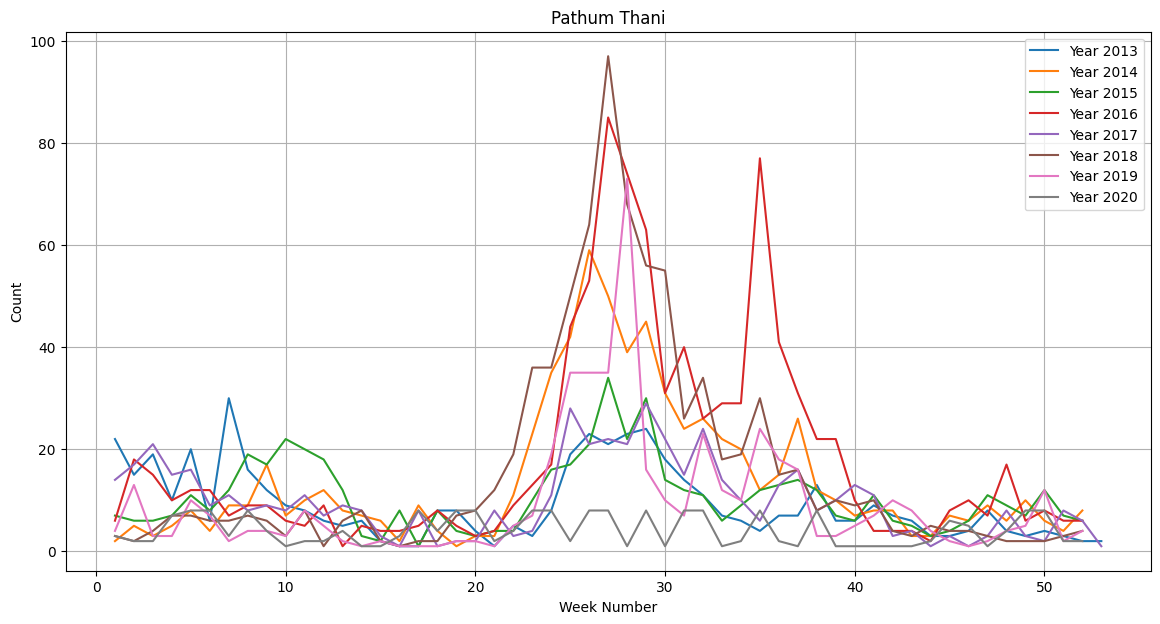


RMSE: 2.1304585961683307


,model,score_test,root_mean_squared_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,-1.175893,-1.175893,-5.714275,root_mean_squared_error,0.016315,0.011878,7.685005,0.016315,0.011878,7.685005,1,True,9
1,WeightedEnsemble_L2,-2.130459,-2.130459,-4.585561,root_mean_squared_error,0.072141,0.065367,4.546904,0.024504,0.000737,0.024239,2,True,11
2,NeuralNetFastAI,-2.221608,-2.221608,-4.615114,root_mean_squared_error,0.021264,0.036273,2.662786,0.021264,0.036273,2.662786,1,True,7
3,ExtraTreesMSE,-2.297721,-2.297721,-6.046979,root_mean_squared_error,0.087006,0.128774,1.735409,0.087006,0.128774,1.735409,1,True,6
4,LightGBM,-2.407214,-2.407214,-6.218864,root_mean_squared_error,0.003401,0.001498,0.676645,0.003401,0.001498,0.676645,1,True,4
5,LightGBMLarge,-2.711696,-2.711696,-5.869901,root_mean_squared_error,1.010995,0.289661,12.516700,1.010995,0.289661,12.516700,1,True,10
6,LightGBMXT,-2.714308,-2.714308,-7.404415,root_mean_squared_error,0.003516,0.010599,0.900787,0.003516,0.010599,0.900787,1,True,3
7,RandomForestMSE,-3.131820,-3.131820,-6.569036,root_mean_squared_error,0.084676,0.123078,1.896337,0.084676,0.123078,1.896337,1,True,5
8,KNeighborsDist,-3.840310,-3.840310,-6.426449,root_mean_squared_error,0.015842,0.047805,0.018831,0.015842,0.047805,0.018831,1,True,2
9,KNeighborsUnif,-3.861347,-3.861347,-6.630071,root_mean_squared_error,0.030342,0.092519,0.019583,0.030342,0.092519,0.019583,1,True,1


In [9]:
province = "Pathum Thani"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Pathum_Thani = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Pathum_Thani.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Pathum_Thani.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<hr>

## Phra Nakhon Si Ayutthaya

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_191510"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.69 GB / 12.67 GB (84.4%)
Disk Space Avail:   76.56 GB / 107.72 GB (71.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 4.67672


	-4.2557	 = Validation score   (-root_mean_squared_error)
	0.42s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-5.3054	 = Validation score   (-root_mean_squared_error)
	1.22s	 = Training   runtime
	0.1s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesMSE ...
	-4.3838	 = Validation score   (-root_mean_squared_error)
	1.41s	 = Training   runtime
	0.08s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-4.196	 = Validation score   (-root_mean_squared_error)
	1.73s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-5.1893	 = Validation score   (-root_mean_squared_error)
	0.57s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-4.0781	 = Validation score   (-root_mean_squared_error)
	3.63s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge ...
	-4.1131	 = Validation score   (-root_mean_squared_error)
	0.78s	 = Training   

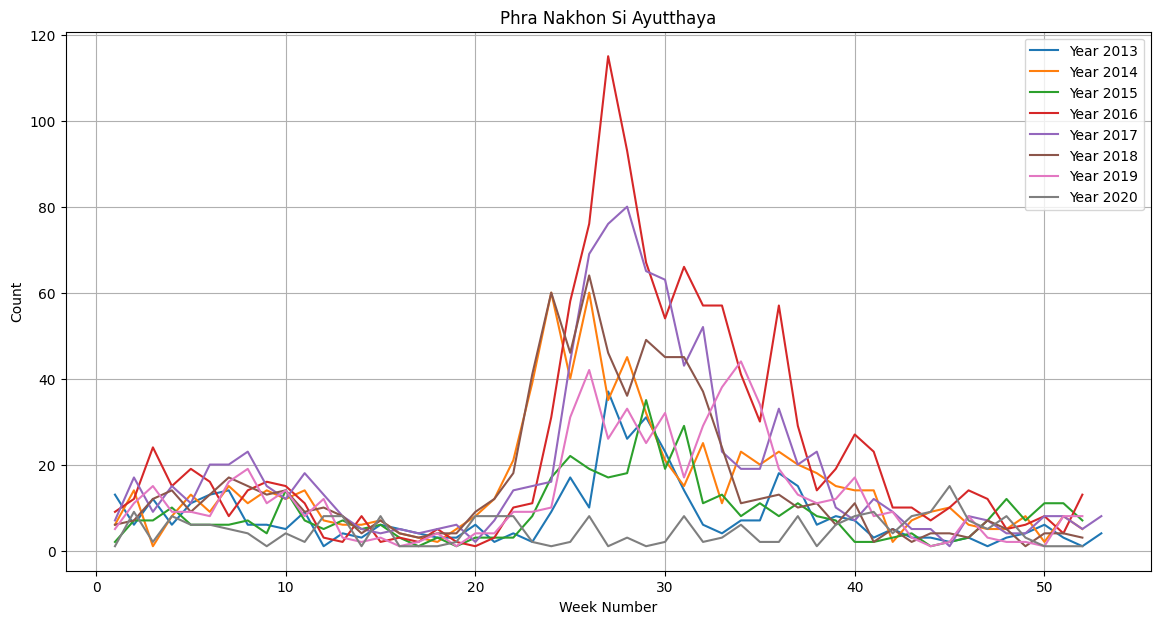


RMSE: 2.123290632423773


,model,score_test,root_mean_squared_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBM,-1.820915,-1.820915,-4.255743,root_mean_squared_error,0.007020,0.002410,0.417241,0.007020,0.002410,0.417241,1,True,4
1,XGBoost,-2.050349,-2.050349,-5.189314,root_mean_squared_error,0.031199,0.008041,0.573254,0.031199,0.008041,0.573254,1,True,8
2,RandomForestMSE,-2.070369,-2.070369,-5.305367,root_mean_squared_error,0.094193,0.097519,1.221318,0.094193,0.097519,1.221318,1,True,5
3,ExtraTreesMSE,-2.109438,-2.109438,-4.383778,root_mean_squared_error,0.087273,0.076825,1.405377,0.087273,0.076825,1.405377,1,True,6
4,WeightedEnsemble_L2,-2.123291,-2.123291,-3.336183,root_mean_squared_error,0.075863,0.032948,6.579948,0.005775,0.000751,0.023757,2,True,11
5,NeuralNetTorch,-2.141211,-2.141211,-4.078104,root_mean_squared_error,0.015960,0.012372,3.628700,0.015960,0.012372,3.628700,1,True,9
6,LightGBMLarge,-2.177033,-2.177033,-4.113096,root_mean_squared_error,0.025924,0.004963,0.777941,0.025924,0.004963,0.777941,1,True,10
7,LightGBMXT,-2.683909,-2.683909,-4.662287,root_mean_squared_error,0.023786,0.006595,0.561898,0.023786,0.006595,0.561898,1,True,3
8,NeuralNetFastAI,-2.898651,-2.898651,-4.195950,root_mean_squared_error,0.021185,0.012451,1.732309,0.021185,0.012451,1.732309,1,True,7
9,KNeighborsUnif,-4.004805,-4.004805,-4.941714,root_mean_squared_error,0.014688,0.031037,0.030030,0.014688,0.031037,0.030030,1,True,1


In [10]:
province = "Phra Nakhon Si Ayutthaya"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Phra_Nakhon_Si_Ayutthaya = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Phra_Nakhon_Si_Ayutthaya.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Phra_Nakhon_Si_Ayutthaya.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<hr>

## Ang Thong

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_191523"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.68 GB / 12.67 GB (84.3%)
Disk Space Avail:   76.54 GB / 107.72 GB (71.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 2.36736
[2000]	valid_set's rmse: 2.10152
[3000]	valid_set's rmse: 1.9645
[4000]	valid_set's rmse: 1.87314
[5000]	valid_set's rmse: 1.81346
[6000]	valid_set's rmse: 1.79634
[7000]	valid_set's rmse: 1.76076
[8000]	valid_set's rmse: 1.75717
[9000]	valid_set's rmse: 1.75492
[10000]	valid_set's rmse: 1.75859


	-1.7487	 = Validation score   (-root_mean_squared_error)
	2.65s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 2.63633
[2000]	valid_set's rmse: 2.33214
[3000]	valid_set's rmse: 2.21025
[4000]	valid_set's rmse: 2.20057


	-2.1972	 = Validation score   (-root_mean_squared_error)
	2.78s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-2.2537	 = Validation score   (-root_mean_squared_error)
	1.22s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesMSE ...
	-1.9853	 = Validation score   (-root_mean_squared_error)
	0.94s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-2.0849	 = Validation score   (-root_mean_squared_error)
	0.95s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-1.7928	 = Validation score   (-root_mean_squared_error)
	0.36s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-1.5851	 = Validation score   (-root_mean_squared_error)
	4.29s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge ...
	-1.7943	 = Validation score   (-root_mean_squared_error)
	0.71s	 = Training

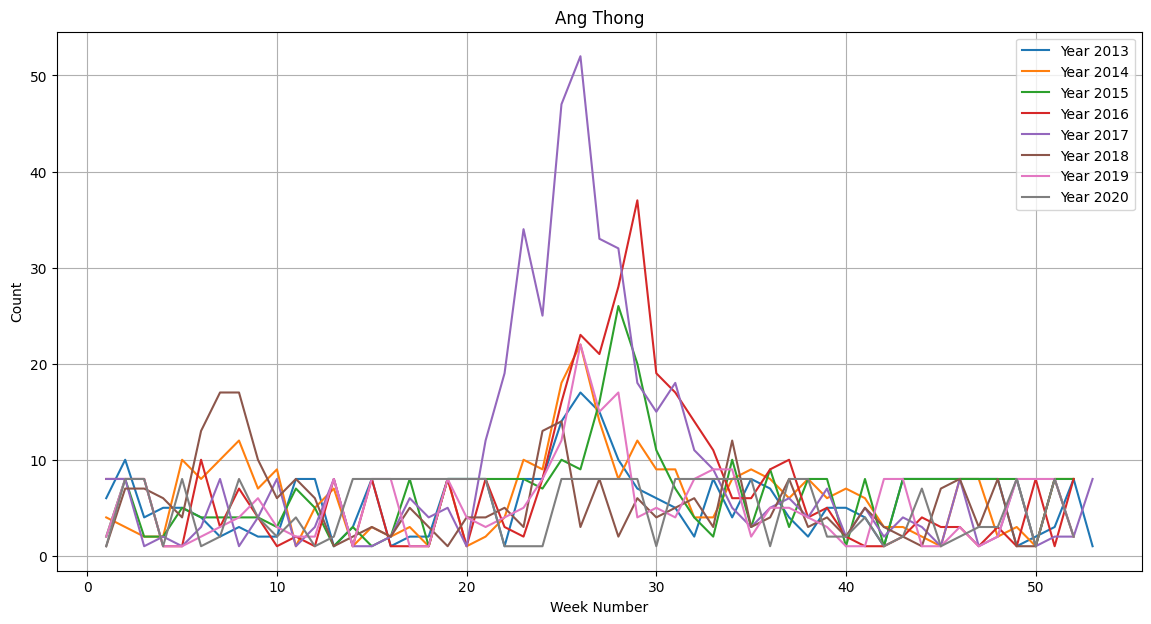


RMSE: 0.9670711168195607


,model,score_test,root_mean_squared_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,ExtraTreesMSE,-0.898763,-0.898763,-1.985265,root_mean_squared_error,0.098290,0.066949,0.935555,0.098290,0.066949,0.935555,1,True,6
1,RandomForestMSE,-0.923095,-0.923095,-2.253686,root_mean_squared_error,0.083745,0.055818,1.219733,0.083745,0.055818,1.219733,1,True,5
2,XGBoost,-0.928872,-0.928872,-1.792782,root_mean_squared_error,0.018413,0.015035,0.357370,0.018413,0.015035,0.357370,1,True,8
3,WeightedEnsemble_L2,-0.967071,-0.967071,-1.231063,root_mean_squared_error,0.253316,0.095244,8.266817,0.005952,0.000747,0.023528,2,True,11
4,LightGBMLarge,-1.074854,-1.074854,-1.794258,root_mean_squared_error,0.023907,0.004129,0.708183,0.023907,0.004129,0.708183,1,True,10
5,LightGBMXT,-1.374689,-1.374689,-1.748661,root_mean_squared_error,0.189849,0.054521,2.646695,0.189849,0.054521,2.646695,1,True,3
6,LightGBM,-1.413494,-1.413494,-2.197248,root_mean_squared_error,0.105439,0.036533,2.775462,0.105439,0.036533,2.775462,1,True,4
7,NeuralNetTorch,-1.930654,-1.930654,-1.585061,root_mean_squared_error,0.015698,0.012809,4.287461,0.015698,0.012809,4.287461,1,True,9
8,NeuralNetFastAI,-1.982171,-1.982171,-2.084902,root_mean_squared_error,0.023404,0.012132,0.951764,0.023404,0.012132,0.951764,1,True,7
9,KNeighborsDist,-3.000534,-3.000534,-3.163184,root_mean_squared_error,0.014494,0.016230,0.011501,0.014494,0.016230,0.011501,1,True,2


In [11]:
province = "Ang Thong"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Ang_Thong = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Ang_Thong.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Ang_Thong.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Lopburi

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_191542"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.68 GB / 12.67 GB (84.3%)
Disk Space Avail:   76.52 GB / 107.72 GB (71.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 4.44194
[2000]	valid_set's rmse: 4.17129


	-4.1437	 = Validation score   (-root_mean_squared_error)
	1.7s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...
	-5.6389	 = Validation score   (-root_mean_squared_error)
	0.74s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-4.5498	 = Validation score   (-root_mean_squared_error)
	1.29s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesMSE ...
	-4.7881	 = Validation score   (-root_mean_squared_error)
	0.97s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-4.9862	 = Validation score   (-root_mean_squared_error)
	0.96s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-4.3408	 = Validation score   (-root_mean_squared_error)
	0.52s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-3.752	 = Validation score   (-root_mean_squared_error)
	5.14s	 = Training   runt

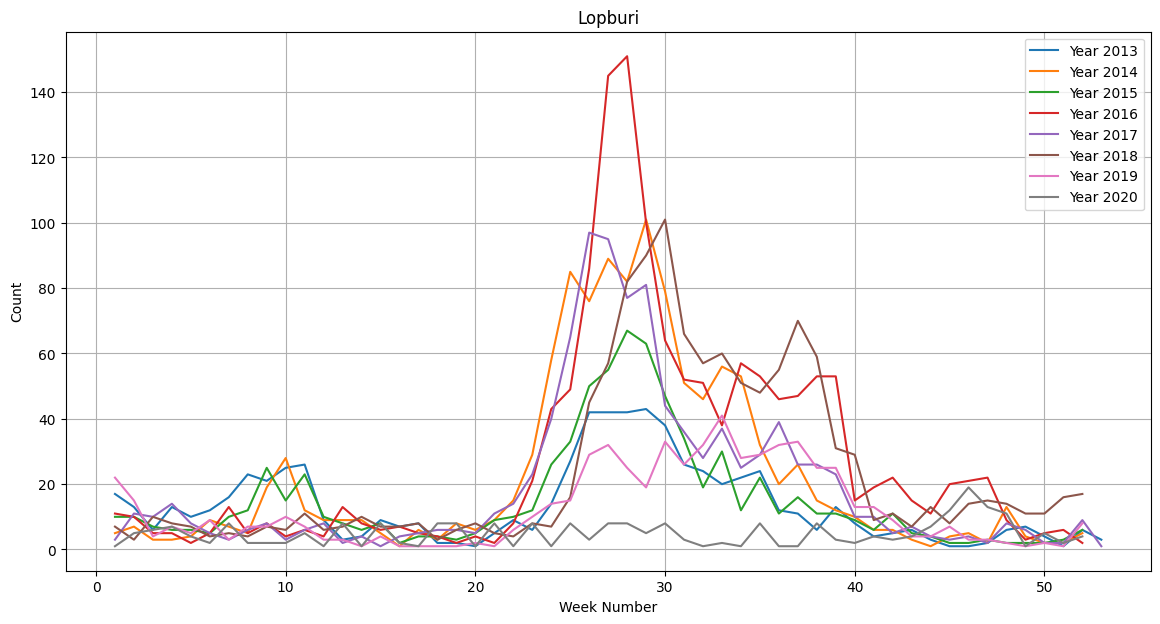


RMSE: 1.7906862385845088


,model,score_test,root_mean_squared_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-1.790686,-1.790686,-3.182536,root_mean_squared_error,0.154063,0.048104,7.836348,0.004519,0.000840,0.034418,2,True,11
1,NeuralNetTorch,-1.852639,-1.852639,-3.751955,root_mean_squared_error,0.026678,0.012085,5.138313,0.026678,0.012085,5.138313,1,True,9
2,LightGBMXT,-2.061666,-2.061666,-4.143743,root_mean_squared_error,0.081661,0.023548,1.704634,0.081661,0.023548,1.704634,1,True,3
3,LightGBM,-2.288051,-2.288051,-5.638938,root_mean_squared_error,0.006365,0.007184,0.738217,0.006365,0.007184,0.738217,1,True,4
4,ExtraTreesMSE,-2.627673,-2.627673,-4.788104,root_mean_squared_error,0.147288,0.066720,0.973089,0.147288,0.066720,0.973089,1,True,6
5,RandomForestMSE,-2.819446,-2.819446,-4.549764,root_mean_squared_error,0.123703,0.066724,1.288859,0.123703,0.066724,1.288859,1,True,5
6,LightGBMLarge,-3.070497,-3.070497,-5.062736,root_mean_squared_error,0.007922,0.001900,0.538408,0.007922,0.001900,0.538408,1,True,10
7,NeuralNetFastAI,-3.186573,-3.186573,-4.986151,root_mean_squared_error,0.041204,0.011631,0.958983,0.041204,0.011631,0.958983,1,True,7
8,XGBoost,-3.381407,-3.381407,-4.340811,root_mean_squared_error,0.050300,0.006185,0.518635,0.050300,0.006185,0.518635,1,True,8
9,KNeighborsUnif,-3.923009,-3.923009,-6.180790,root_mean_squared_error,0.020618,0.026493,0.018679,0.020618,0.026493,0.018679,1,True,1


In [12]:
province = "Lopburi"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Lopburi = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Lopburi.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Lopburi.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Sing Buri

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_191557"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.65 GB / 12.67 GB (84.1%)
Disk Space Avail:   76.50 GB / 107.72 GB (71.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 4.09638
[2000]	valid_set's rmse: 4.08406


	-4.0638	 = Validation score   (-root_mean_squared_error)
	1.56s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: LightGBM ...
	-4.0747	 = Validation score   (-root_mean_squared_error)
	0.73s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-4.0675	 = Validation score   (-root_mean_squared_error)
	1.09s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: CatBoost ...
		
Fitting model: ExtraTreesMSE ...
	-4.1383	 = Validation score   (-root_mean_squared_error)
	1.45s	 = Training   runtime
	0.15s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-1.9835	 = Validation score   (-root_mean_squared_error)
	2.05s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-4.1536	 = Validation score   (-root_mean_squared_error)
	0.79s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-2.5311	 = Validation score   (-root_mean_squared_error)
	10.9s	 = Training   run

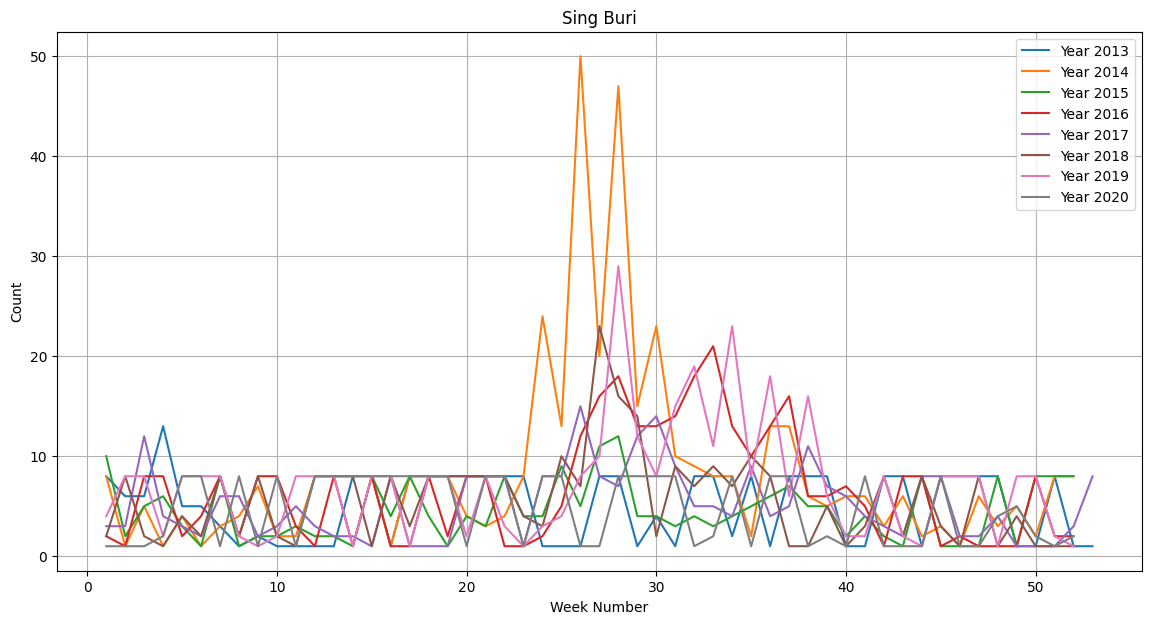


RMSE: 1.112454920458186


,model,score_test,root_mean_squared_error,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,NeuralNetTorch,-0.570853,-0.570853,-2.531066,root_mean_squared_error,0.034234,0.028499,10.898313,0.034234,0.028499,10.898313,1,True,9
1,LightGBMXT,-0.936548,-0.936548,-4.063761,root_mean_squared_error,0.110885,0.024526,1.556852,0.110885,0.024526,1.556852,1,True,3
2,ExtraTreesMSE,-1.000029,-1.000029,-4.138310,root_mean_squared_error,0.144729,0.150246,1.447217,0.144729,0.150246,1.447217,1,True,6
3,LightGBM,-1.063830,-1.063830,-4.074736,root_mean_squared_error,0.020654,0.002920,0.734189,0.020654,0.002920,0.734189,1,True,4
4,WeightedEnsemble_L2,-1.112455,-1.112455,-1.909986,root_mean_squared_error,0.081660,0.041353,13.012805,0.013808,0.000777,0.060838,2,True,11
5,RandomForestMSE,-1.208913,-1.208913,-4.067506,root_mean_squared_error,0.185108,0.112650,1.091486,0.185108,0.112650,1.091486,1,True,5
6,LightGBMLarge,-1.362512,-1.362512,-3.372039,root_mean_squared_error,0.042428,0.003981,1.624510,0.042428,0.003981,1.624510,1,True,10
7,NeuralNetFastAI,-1.394566,-1.394566,-1.983463,root_mean_squared_error,0.033618,0.012077,2.053654,0.033618,0.012077,2.053654,1,True,7
8,XGBoost,-1.639594,-1.639594,-4.153609,root_mean_squared_error,0.068535,0.007535,0.788236,0.068535,0.007535,0.788236,1,True,8
9,KNeighborsDist,-3.088280,-3.088280,-5.561712,root_mean_squared_error,0.023413,0.033725,0.013260,0.023413,0.033725,0.013260,1,True,2


In [13]:
province = "Sing Buri"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Sing_Buri = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Sing_Buri.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Sing_Buri.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Chainat

In [ ]:
province = "Chainat"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Chainat = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Chainat.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Chainat.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

No path specified. Models will be saved in: "AutogluonModels/ag-20240803_191621"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       10.45 GB / 12.67 GB (82.5%)
Disk Space Avail:   76.49 GB / 107.72 GB (71.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's rmse: 1.96995
[2000]	valid_set's rmse: 1.85312


	-1.8471	 = Validation score   (-root_mean_squared_error)
	1.7s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBM ...
	-1.7913	 = Validation score   (-root_mean_squared_error)
	1.94s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: RandomForestMSE ...


[1000]	valid_set's rmse: 1.81069


<br>

## Saraburi

In [ ]:
province = "Saraburi"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Saraburi = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Saraburi.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Saraburi.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Chonburi

In [ ]:
province = "Chonburi"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Chonburi = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Chonburi.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Chonburi.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Rayong

In [ ]:
province = "Rayong"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Rayong = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Rayong.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Rayong.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Chanthaburi

In [ ]:
province = "Chanthaburi"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Chanthaburi = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Chanthaburi.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Chanthaburi.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Trat

In [ ]:
province = "Trat"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Trat = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Trat.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Trat.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Chachoengsao

In [ ]:
province = "Chachoengsao"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Chachoengsao = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Chachoengsao.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Chachoengsao.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Prachinburi

In [ ]:
province = "Prachinburi"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Prachinburi = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Prachinburi.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Prachinburi.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Nakhon Nayok

In [ ]:
province = "Nakhon Nayok"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nakhon_Nayok = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nakhon_Nayok.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nakhon_Nayok.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Sa Kaeo

In [ ]:
province = "Sa Kaeo"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Sa_Kaeo = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Sa_Kaeo.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Sa_Kaeo.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Nakhon Ratchasima

In [ ]:
province = "Nakhon Ratchasima"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nakhon_Ratchasima = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nakhon_Ratchasima.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nakhon_Ratchasima.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Buriram

In [ ]:
province = "Buriram"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Buriram = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Buriram.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Buriram.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Surin

In [ ]:
province = "Surin"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Surin = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Surin.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Surin.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<hr>

<br>

## Sisaket

In [ ]:
province = "Sisaket"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Sisaket = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Sisaket.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Sisaket.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Ubon Ratchathani

In [ ]:
province = "Ubon Ratchathani"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Ubon_Ratchathani = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Ubon_Ratchathani.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Ubon_Ratchathani.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Yasothon

In [ ]:
province = "Yasothon"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Yasothon = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Yasothon.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Yasothon.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Chaiyaphum

In [ ]:
province = "Chaiyaphum"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Chaiyaphum = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Chaiyaphum.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Chaiyaphum.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Amnat Charoen

In [ ]:
province = "Amnat Charoen"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Amnat_Charoen = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Amnat_Charoen.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Amnat_Charoen.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Bueng Kan

In [ ]:
province = "Bueng Kan"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Bueng_Kan = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Bueng_Kan.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Bueng_Kan.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Nong Bua Lamphu

In [ ]:
province = "Nong Bua Lamphu"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nong_Bua_Lamphu = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nong_Bua_Lamphu.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nong_Bua_Lamphu.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

## Khon Kaen

In [ ]:
province = "Khon Kaen"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Khon_Kaen = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Khon_Kaen.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Khon_Kaen.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Udon Thani

In [ ]:
province = "Udon Thani"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Udon_Thani = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Udon_Thani.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Udon_Thani.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Loei

In [ ]:
province = "Loei"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Loei = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Loei.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Loei.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Nong Khai

In [ ]:
province = "Nong Khai"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nong_Khai = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nong_Khai.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nong_Khai.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Maha Sarakham

In [ ]:
province = "Nong Khai"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nong_Khai = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nong_Khai.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nong_Khai.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Roi Et

In [ ]:
province = "Roi Et"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Roi_Et = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Roi_Et.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Roi_Et.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Kalasin

In [ ]:
province = "Kalasin"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Kalasin = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Kalasin.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Kalasin.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Sakon Nakhon

In [ ]:
province = "Sakon Nakhon"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Sakon_Nakhon = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Sakon_Nakhon.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Sakon_Nakhon.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Nakhon Phanom

In [ ]:
province = "Nakhon Phanom"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nakhon_Phanom = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nakhon_Phanom.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nakhon_Phanom.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Mukdahan

In [ ]:
province = "Mukdahan"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Mukdahan = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Mukdahan.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Mukdahan.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Chiang Mai

In [ ]:
province = "Chiang Mai"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Chiang_Mai = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Chiang_Mai.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Chiang_Mai.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Lamphun

In [ ]:
province = "Lamphun"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Lamphun = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Lamphun.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Lamphun.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Lampang

In [ ]:
province = "Lampang"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Lampang = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Lampang.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Lampang.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Uttaradit

In [ ]:
province = "Uttaradit"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Uttaradit = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Uttaradit.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Uttaradit.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Phrae

In [ ]:
province = "Phrae"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Phrae = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Phrae.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Phrae.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Nan

In [ ]:
province = "Nan"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nan = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nan.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nan.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Phayao

In [ ]:
province = "Phayao"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Phayao = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Phayao.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Phayao.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Chiang Rai

In [ ]:
province = "Chiang Rai"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Chiang_Rai = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Chiang_Rai.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Chiang_Rai.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Mae Hong Son

In [ ]:
province = "Mae Hong Son"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Mae_Hong_Son = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Mae_Hong_Son.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Mae_Hong_Son.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Nakhon Sawan

In [ ]:
province = "Nakhon Sawan"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nakhon_Sawan = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nakhon_Sawan.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nakhon_Sawan.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Uthai Thani

In [ ]:
province = "Uthai Thani"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Uthai_Thani = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Uthai_Thani.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Uthai_Thani.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Kamphaeng Phet

In [ ]:
province = "Kamphaeng Phet"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Kamphaeng_Phet = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Kamphaeng_Phet.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Kamphaeng_Phet.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Tak

In [ ]:
province = "Tak"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Tak = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Tak.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Tak.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Sukhothai

In [ ]:
province = "Sukhothai"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Sukhothai = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Sukhothai.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Sukhothai.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Phitsanulok

In [ ]:
province = "Phitsanulok"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Phitsanulok = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Phitsanulok.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Phitsanulok.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Phichit

In [ ]:
province = "Phichit"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Phichit = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Phichit.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Phichit.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Phetchabun

In [ ]:
province = "Phetchabun"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Phetchabun = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Phetchabun.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Phetchabun.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Ratchaburi

In [ ]:
province = "Ratchaburi"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Ratchaburi = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Ratchaburi.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Ratchaburi.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Kanchanaburi

In [ ]:
province = "Kanchanaburi"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Kanchanaburi = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Kanchanaburi.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Kanchanaburi.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Suphan Buri

In [ ]:
province = "Suphan Buri"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Suphan_Buri = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Suphan_Buri.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Suphan_Buri.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Nakhon Pathom

In [ ]:
province = "Nakhon Pathom"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nakhon_Pathom = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nakhon_Pathom.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nakhon_Pathom.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Samut Sakhon

In [ ]:
province = "Samut Sakhon"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Samut_Sakhon = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Samut_Sakhon.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Samut_Sakhon.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Samut Songkhram

In [ ]:
province = "Samut Songkhram"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Samut_Songkhram = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Samut_Songkhram.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Samut_Songkhram.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Phetchaburi

In [ ]:
province = "Phetchaburi"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Phetchaburi = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Phetchaburi.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Phetchaburi.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Prachuap Khiri Khan

In [ ]:
province = "Prachuap Khiri Khan"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Prachuap_Khiri_Khan = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Prachuap_Khiri_Khan.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Prachuap_Khiri_Khan.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Nakhon Si Thammarat

In [ ]:
province = "Nakhon Si Thammarat"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Nakhon_Si_Thammarat = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Nakhon_Si_Thammarat.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Nakhon_Si_Thammarat.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Krabi

In [ ]:
province = "Krabi"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Krabi = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Krabi.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Krabi.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Phang Nga

In [ ]:
province = "Phang Nga"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Phang_Nga = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Phang_Nga.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Phang_Nga.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Phuket

In [ ]:
province = "Phuket"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Phuket = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Phuket.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Phuket.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Surat Thani

In [ ]:
province = "Surat Thani"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Surat_Thani = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Surat_Thani.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Surat_Thani.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Ranong

In [ ]:
province = "Ranong"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Ranong = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Ranong.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Ranong.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Chumphon

In [ ]:
province = "Chumphon"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Chumphon = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Chumphon.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Chumphon.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Songkhla

In [ ]:
province = "Songkhla"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Songkhla = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Songkhla.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Songkhla.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Satun

In [ ]:
province = "Satun"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Satun = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Satun.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Satun.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Trang

In [ ]:
province = "Trang"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Trang = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Trang.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Trang.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Phatthalung

In [ ]:
province = "Phatthalung"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Phatthalung = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Phatthalung.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Phatthalung.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Pattani

In [ ]:
province = "Pattani"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Pattani = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Pattani.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Pattani.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Yala


In [ ]:
province = "Yala"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Yala = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Yala.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Yala.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<br>

## Narathiwat

In [ ]:
province = "Narathiwat"
province_df = train_df[train_df['PROVINCE']==province]
years[:-1] = [2013,2014,2015,2016,2017,2018,2019]
[years[-1]]    = [2020]
province_train_df = province_df[province_df['Year'].isin(years[:-1])].copy()
province_val_df = province_df[province_df['Year'].isin([years[-1]])].copy()
for lag in range(1, 4):
    province_train_df.loc[:, f'Lag_{lag}'] = province_train_df['Count'].shift(lag)
    province_val_df.loc[:, f'Lag_{lag}'] = province_val_df['Count'].shift(lag)
province_train_df.loc[:, 'Moving_Avg_3'] = province_train_df['Count'].rolling(window=3).mean()
province_val_df.loc[:, 'Moving_Avg_3'] = province_val_df['Count'].rolling(window=3).mean()
province_train_df.fillna(0, inplace=True)
province_val_df.fillna(0, inplace=True)
X_train = province_train_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_train = province_train_df['Count']
X_val = province_val_df[['Year', 'PROVINCE', 'Week_no', 'Lag_1', 'Lag_2', 'Lag_3', 'Moving_Avg_3']]
y_val = province_val_df['Count']
train_data = X_train.copy()
train_data['Count'] = y_train
val_data = X_val.copy()
val_data['Count'] = y_val
Narathiwat = TabularPredictor(label='Count', problem_type='regression', eval_metric='rmse').fit(train_data)
leaderboard = Narathiwat.leaderboard(val_data, extra_metrics=['rmse'])
y_pred = Narathiwat.predict(X_val)
rmse_value = rmse(y_val, y_pred)
pplot(pd.concat([province_train_df,province_val_df]),province)
print(f"\nRMSE: {rmse_value}")
pvrecord[province] = rmse_value
leaderboard

<hr><hr>

# Predict switching

In [ ]:
# df = pd.read_csv("/content/sample_submission.csv")
# for idx,row in df[3:].iterrows():
#     data = test_df[test_df['_id']==row['_id']].drop(columns=['_id','Disease'])
#     # print(data.PROVINCE)
#     province = data.PROVINCE.iloc[0]
#     # print(province)
#     if province == "Bangkok":
#         df.at[idx,'Pred'] = Bangkok.predict(data)
#     elif province == "Samut Prakan":
#         df.at[idx,'Pred'] = Samut_Prakan.predict(data)
#     elif province == "Nonthaburi":
#         df.at[idx,'Pred'] = Nonthaburi.predict(data)
#     elif province == "Pathum Thani":
#         df.at[idx,'Pred'] = Pathum_Thani.predict(data)
#     elif province == "Phra Nakhon Si Ayutthaya":
#         df.at[idx,'Pred'] = Phra_Nakhon_Si_Ayutthaya.predict(data)
#     elif province == "Ang Thong":
#         df.at[idx,'Pred'] = Ang_Thong.predict(data)
#     elif province == "Lopburi":
#         df.at[idx,'Pred'] = Lopburi.predict(data)
#     elif province == "Sing Buri":
#         df.at[idx,'Pred'] = Sing_Buri.predict(data)
#     elif province == "Chainat":
#         df.at[idx,'Pred'] = Chainat.predict(data)
#     elif province == "Saraburi":
#         df.at[idx,'Pred'] = Saraburi.predict(data)
#     elif province == "Chonburi":
#         df.at[idx,'Pred'] = Chonburi.predict(data)
#     elif province == "Rayong":
#         df.at[idx,'Pred'] = Rayong.predict(data)
#     elif province == "Chanthaburi":
#         df.at[idx,'Pred'] = Chanthaburi.predict(data)
#     elif province == "Trat":
#         df.at[idx,'Pred'] = Trat.predict(data)
#     elif province == "Chachoengsao":
#         df.at[idx,'Pred'] = Chachoengsao.predict(data)
#     elif province == "Prachinburi":
#         df.at[idx,'Pred'] = Prachinburi.predict(data)
#     elif province == "Nakhon Nayok":
#         df.at[idx,'Pred'] = Nakhon_Nayok.predict(data)
#     elif province == "Sa Kaeo":
#         df.at[idx,'Pred'] = Sa_Kaeo.predict(data)
#     elif province == "Nakhon Ratchasima":
#         df.at[idx,'Pred'] = Nakhon_Ratchasima.predict(data)
#     elif province == "Buriram":
#         df.at[idx,'Pred'] = Buriram.predict(data)
#     elif province == "Surin":
#         df.at[idx,'Pred'] = Surin.predict(data)
#     elif province == "Sisaket":
#         df.at[idx,'Pred'] = Sisaket.predict(data)
#     elif province == "Ubon Ratchathani":
#         df.at[idx,'Pred'] = Ubon_Ratchathani.predict(data)
#     elif province == "Yasothon":
#         df.at[idx,'Pred'] = Yasothon.predict(data)
#     elif province == "Chaiyaphum":
#         df.at[idx,'Pred'] = Chaiyaphum.predict(data)
#     elif province == "Amnat Charoen":
#         df.at[idx,'Pred'] = Amnat_Charoen.predict(data)
#     elif province == "Bueng Kan":
#         df.at[idx,'Pred'] = Bueng_Kan.predict(data)
#     elif province == "Nong Bua Lamphu":
#         df.at[idx,'Pred'] = Nong_Bua_Lamphu.predict(data)
#     elif province == "Khon Kaen":
#         df.at[idx,'Pred'] = Khon_Kaen.predict(data)
#     elif province == "Udon Thani":
#         df.at[idx,'Pred'] = Udon_Thani.predict(data)
#     elif province == "Loei":
#         df.at[idx,'Pred'] = Loei.predict(data)
#     elif province == "Nong Khai":
#         df.at[idx,'Pred'] = Nong_Khai.predict(data)
#     elif province == "Maha Sarakham":
#         df.at[idx,'Pred'] = Maha_Sarakham.predict(data)
#     elif province == "Roi Et":
#         df.at[idx,'Pred'] = Roi_Et.predict(data)
#     elif province == "Kalasin":
#         df.at[idx,'Pred'] = Kalasin.predict(data)
#     elif province == "Sakon Nakhon":
#         df.at[idx,'Pred'] = Sakon_Nakhon.predict(data)
#     elif province == "Nakhon Phanom":
#         df.at[idx,'Pred'] = Nakhon_Phanom.predict(data)
#     elif province == "Mukdahan":
#         df.at[idx,'Pred'] = Mukdahan.predict(data)
#     elif province == "Chiang Mai":
#         df.at[idx,'Pred'] = Chiang_Mai.predict(data)
#     elif province == "Lamphun":
#         df.at[idx,'Pred'] = Lamphun.predict(data)
#     elif province == "Lampang":
#         df.at[idx,'Pred'] = Lampang.predict(data)
#     elif province == "Uttaradit":
#         df.at[idx,'Pred'] = Uttaradit.predict(data)
#     elif province == "Phrae":
#         df.at[idx,'Pred'] = Phrae.predict(data)
#     elif province == "Nan":
#         df.at[idx,'Pred'] = Nan.predict(data)
#     elif province == "Phayao":
#         df.at[idx,'Pred'] = Phayao.predict(data)
#     elif province == "Chiang Rai":
#         df.at[idx,'Pred'] = Chiang_Rai.predict(data)
#     elif province == "Mae Hong Son":
#         df.at[idx,'Pred'] = Mae_Hong_Son.predict(data)
#     elif province == "Nakhon Sawan":
#         df.at[idx,'Pred'] = Nakhon_Sawan.predict(data)
#     elif province == "Uthai Thani":
#         df.at[idx,'Pred'] = Uthai_Thani.predict(data)
#     elif province == "Kamphaeng Phet":
#         df.at[idx,'Pred'] = Kamphaeng_Phet.predict(data)
#     elif province == "Tak":
#         df.at[idx,'Pred'] = Tak.predict(data)
#     elif province == "Sukhothai":
#         df.at[idx,'Pred'] = Sukhothai.predict(data)
#     elif province == "Phitsanulok":
#         df.at[idx,'Pred'] = Phitsanulok.predict(data)
#     elif province == "Phichit":
#         df.at[idx,'Pred'] = Phichit.predict(data)
#     elif province == "Phetchabun":
#         df.at[idx,'Pred'] = Phetchabun.predict(data)
#     elif province == "Ratchaburi":
#         df.at[idx,'Pred'] = Ratchaburi.predict(data)
#     elif province == "Kanchanaburi":
#         df.at[idx,'Pred'] = Kanchanaburi.predict(data)
#     elif province == "Suphan Buri":
#         df.at[idx,'Pred'] = Suphan_Buri.predict(data)
#     elif province == "Nakhon Pathom":
#         df.at[idx,'Pred'] = Nakhon_Pathom.predict(data)
#     elif province == "Samut Sakhon":
#         df.at[idx,'Pred'] = Samut_Sakhon.predict(data)
#     elif province == "Samut Songkhram":
#         df.at[idx,'Pred'] = Samut_Songkhram.predict(data)
#     elif province == "Phetchaburi":
#         df.at[idx,'Pred'] = Phetchaburi.predict(data)
#     elif province == "Prachuap Khiri Khan":
#         df.at[idx,'Pred'] = Prachuap_Khiri_Khan.predict(data)
#     elif province == "Nakhon Si Thammarat":
#         df.at[idx,'Pred'] = Nakhon_Si_Thammarat.predict(data)
#     elif province == "Krabi":
#         df.at[idx,'Pred'] = Krabi.predict(data)
#     elif province == "Phang Nga":
#         df.at[idx,'Pred'] = Phang_Nga.predict(data)
#     elif province == "Phuket":
#         df.at[idx,'Pred'] = Phuket.predict(data)
#     elif province == "Surat Thani":
#         df.at[idx,'Pred'] = Surat_Thani.predict(data)
#     elif province == "Ranong":
#         df.at[idx,'Pred'] = Ranong.predict(data)
#     elif province == "Chumphon":
#         df.at[idx,'Pred'] = Chumphon.predict(data)
#     elif province == "Songkhla":
#         df.at[idx,'Pred'] = Songkhla.predict(data)
#     elif province == "Satun":
#         df.at[idx,'Pred'] = Satun.predict(data)
#     elif province == "Trang":
#         df.at[idx,'Pred'] = Trang.predict(data)
#     elif province == "Phatthalung":
#         df.at[idx,'Pred'] = Phatthalung.predict(data)
#     elif province == "Pattani":
#         df.at[idx,'Pred'] = Pattani.predict(data)
#     elif province == "Yala":
#         df.at[idx,'Pred'] = Yala.predict(data)
#     elif province == "Narathiwat":
#         df.at[idx,'Pred'] = Narathiwat.predict(data)
#     else:
#         print(f"\n\n\nData issue detected in row {idx}. Interrupting process.")
#         break
#         # df.at[idx,'Pred'] = "???"

In [ ]:
df = pd.read_csv("/content/sample_submission.csv")
# Add new columns using .loc
df.loc[:, 'Lag_1'] = 0.0
df.loc[:, 'Lag_2'] = 0.0
df.loc[:, 'Lag_3'] = 0.0
df.loc[:, 'Moving_Avg_3'] = 0.0
df

In [ ]:
# df = pd.read_csv("/content/sample_submission.csv")
for idx,row in df[3:].iterrows():
    data = test_df[test_df['_id']==row['_id']].drop(columns=['_id','Disease'])
    # print(data.PROVINCE)
    province = data.PROVINCE.iloc[0]
    # print(province)
    if province == "Bangkok":
        result = Bangkok.predict(data)
    elif province == "Samut Prakan":
        result = Samut_Prakan.predict(data)
    elif province == "Nonthaburi":
        result = Nonthaburi.predict(data)
    elif province == "Pathum Thani":
        result = Pathum_Thani.predict(data)
    elif province == "Phra Nakhon Si Ayutthaya":
        result = Phra_Nakhon_Si_Ayutthaya.predict(data)
    elif province == "Ang Thong":
        result = Ang_Thong.predict(data)
    elif province == "Lopburi":
        result = Lopburi.predict(data)
    elif province == "Sing Buri":
        result = Sing_Buri.predict(data)
    elif province == "Chainat":
        result = Chainat.predict(data)
    elif province == "Saraburi":
        result = Saraburi.predict(data)
    elif province == "Chonburi":
        result = Chonburi.predict(data)
    elif province == "Rayong":
        result = Rayong.predict(data)
    elif province == "Chanthaburi":
        result = Chanthaburi.predict(data)
    elif province == "Trat":
        result = Trat.predict(data)
    elif province == "Chachoengsao":
        result = Chachoengsao.predict(data)
    elif province == "Prachinburi":
        result = Prachinburi.predict(data)
    elif province == "Nakhon Nayok":
        result = Nakhon_Nayok.predict(data)
    elif province == "Sa Kaeo":
        result = Sa_Kaeo.predict(data)
    elif province == "Nakhon Ratchasima":
        result = Nakhon_Ratchasima.predict(data)
    elif province == "Buriram":
        result = Buriram.predict(data)
    elif province == "Surin":
        result = Surin.predict(data)
    elif province == "Sisaket":
        result = Sisaket.predict(data)
    elif province == "Ubon Ratchathani":
        result = Ubon_Ratchathani.predict(data)
    elif province == "Yasothon":
        result = Yasothon.predict(data)
    elif province == "Chaiyaphum":
        result = Chaiyaphum.predict(data)
    elif province == "Amnat Charoen":
        result = Amnat_Charoen.predict(data)
    elif province == "Bueng Kan":
        result = Bueng_Kan.predict(data)
    elif province == "Nong Bua Lamphu":
        result = Nong_Bua_Lamphu.predict(data)
    elif province == "Khon Kaen":
        result = Khon_Kaen.predict(data)
    elif province == "Udon Thani":
        result = Udon_Thani.predict(data)
    elif province == "Loei":
        result = Loei.predict(data)
    elif province == "Nong Khai":
        result = Nong_Khai.predict(data)
    elif province == "Maha Sarakham":
        result = Maha_Sarakham.predict(data)
    elif province == "Roi Et":
        result = Roi_Et.predict(data)
    elif province == "Kalasin":
        result = Kalasin.predict(data)
    elif province == "Sakon Nakhon":
        result = Sakon_Nakhon.predict(data)
    elif province == "Nakhon Phanom":
        result = Nakhon_Phanom.predict(data)
    elif province == "Mukdahan":
        result = Mukdahan.predict(data)
    elif province == "Chiang Mai":
        result = Chiang_Mai.predict(data)
    elif province == "Lamphun":
        result = Lamphun.predict(data)
    elif province == "Lampang":
        result = Lampang.predict(data)
    elif province == "Uttaradit":
        result = Uttaradit.predict(data)
    elif province == "Phrae":
        result = Phrae.predict(data)
    elif province == "Nan":
        result = Nan.predict(data)
    elif province == "Phayao":
        result = Phayao.predict(data)
    elif province == "Chiang Rai":
        result = Chiang_Rai.predict(data)
    elif province == "Mae Hong Son":
        result = Mae_Hong_Son.predict(data)
    elif province == "Nakhon Sawan":
        result = Nakhon_Sawan.predict(data)
    elif province == "Uthai Thani":
        result = Uthai_Thani.predict(data)
    elif province == "Kamphaeng Phet":
        result = Kamphaeng_Phet.predict(data)
    elif province == "Tak":
        result = Tak.predict(data)
    elif province == "Sukhothai":
        result = Sukhothai.predict(data)
    elif province == "Phitsanulok":
        result = Phitsanulok.predict(data)
    elif province == "Phichit":
        result = Phichit.predict(data)
    elif province == "Phetchabun":
        result = Phetchabun.predict(data)
    elif province == "Ratchaburi":
        result = Ratchaburi.predict(data)
    elif province == "Kanchanaburi":
        result = Kanchanaburi.predict(data)
    elif province == "Suphan Buri":
        result = Suphan_Buri.predict(data)
    elif province == "Nakhon Pathom":
        result = Nakhon_Pathom.predict(data)
    elif province == "Samut Sakhon":
        result = Samut_Sakhon.predict(data)
    elif province == "Samut Songkhram":
        result = Samut_Songkhram.predict(data)
    elif province == "Phetchaburi":
        result = Phetchaburi.predict(data)
    elif province == "Prachuap Khiri Khan":
        result = Prachuap_Khiri_Khan.predict(data)
    elif province == "Nakhon Si Thammarat":
        result = Nakhon_Si_Thammarat.predict(data)
    elif province == "Krabi":
        result = Krabi.predict(data)
    elif province == "Phang Nga":
        result = Phang_Nga.predict(data)
    elif province == "Phuket":
        result = Phuket.predict(data)
    elif province == "Surat Thani":
        result = Surat_Thani.predict(data)
    elif province == "Ranong":
        result = Ranong.predict(data)
    elif province == "Chumphon":
        result = Chumphon.predict(data)
    elif province == "Songkhla":
        result = Songkhla.predict(data)
    elif province == "Satun":
        result = Satun.predict(data)
    elif province == "Trang":
        result = Trang.predict(data)
    elif province == "Phatthalung":
        result = Phatthalung.predict(data)
    elif province == "Pattani":
        result = Pattani.predict(data)
    elif province == "Yala":
        result = Yala.predict(data)
    elif province == "Narathiwat":
        result = Narathiwat.predict(data)
    else:
        print(f"\n\n\nData issue detected in row {idx}. Interrupting process.")
        break

    # Ensure result is a scalar value
    if isinstance(result, pd.Series):
        result = result.iloc[0]

    # Ensure result is not negative
    if result < 1:
        result = 1.0

    # Assign the result to the dataframe
    df.at[idx, 'Pred'] = result

In [ ]:
df

In [ ]:
version = '2.1.3'
formatted_time = time.strftime("%H.%M", time.localtime())
formatted_time = str(int(formatted_time.split(".")[0])+7)+formatted_time.split(".")[1]
formatted_time
csv_name = f'v.{version}.{formatted_time}.csv'
print(csv_name)
df.to_csv(csv_name,index=False)

In [ ]:
pvrecord

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
total_rmse = sum(pvrecord.values())
print(f"Total RMSE: {total_rmse}")

# Creating a bar plot
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(pvrecord.keys(), pvrecord.values(), color='skyblue')
ax.set_xlabel('Province')
ax.set_ylabel('RMSE')
ax.set_title('RMSE Values by Province')
ax.set_ylim(0, max(pvrecord.values()) + 10)

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Adding the RMSE values on top of the bars
for i, v in enumerate(pvrecord.values()):
    ax.text(i, v + 1, f'{v:.2f}', ha='center')

# Display the plot
plt.grid(alpha=0.3)
plt.show()


In [ ]:
pvrecord0  = {'Bangkok': 76.36063676449949,
 'Samut Prakan': 13.049635977070057,
 'Nonthaburi': 7.249497713985841,
 'Pathum Thani': 8.574577749408144,
 'Phra Nakhon Si Ayutthaya': 8.763172056558089,
 'Ang Thong': 3.5622489642936315,
 'Lopburi': 7.394539554350971,
 'Sing Buri': 6.253745392561713,
 'Chainat': 4.850372128317462,
 'Saraburi': 9.004934429518402,
 'Chonburi': 10.784751151284173,
 'Rayong': 29.29362612877891,
 'Chanthaburi': 9.039207586402009,
 'Trat': 8.967513750095625,
 'Chachoengsao': 10.776458397495487,
 'Prachinburi': 10.575305865941772,
 'Nakhon Nayok': 3.652860249914554,
 'Sa Kaeo': 8.265378298643776,
 'Nakhon Ratchasima': 24.678096716895894,
 'Buriram': 10.444504297959122,
 'Surin': 24.616549364792785,
 'Sisaket': 12.624889186982282,
 'Ubon Ratchathani': 18.02407231485729,
 'Yasothon': 5.259409681477039,
 'Chaiyaphum': 19.807608785001023,
 'Amnat Charoen': 5.878235959045015,
 'Bueng Kan': 3.7951607901835005,
 'Nong Bua Lamphu': 3.327853211591088,
 'Khon Kaen': 18.12098161888682,
 'Udon Thani': 6.412187338357021,
 'Loei': 5.8572859313625605,
 'Nong Khai': 4.296222163775307,
 'Maha Sarakham': 7.971467665882491,
 'Roi Et': 9.630361738476637,
 'Kalasin': 6.6386293797418015,
 'Sakon Nakhon': 5.16666162320079,
 'Nakhon Phanom': 4.059842034208891,
 'Mukdahan': 4.6688712445788125,
 'Chiang Mai': 15.419972781224041,
 'Lamphun': 7.53656421144407,
 'Lampang': 7.957290790165344,
 'Uttaradit': 3.397264339792317,
 'Phrae': 4.495905692917569,
 'Nan': 9.740079675824619,
 'Phayao': 6.372662040035755,
 'Chiang Rai': 11.936946678828246,
 'Mae Hong Son': 5.371809629955286,
 'Nakhon Sawan': 11.906167302534225,
 'Uthai Thani': 3.9118348052198804,
 'Kamphaeng Phet': 9.525922515895905,
 'Tak': 5.464342176058535,
 'Sukhothai': 9.421698008380176,
 'Phitsanulok': 9.6757096172131,
 'Phichit': 8.118654864730004,
 'Phetchabun': 8.282681051272142,
 'Ratchaburi': 5.9871252340905965,
 'Kanchanaburi': 6.699083833956905,
 'Suphan Buri': 4.831099975430087,
 'Nakhon Pathom': 9.182769187059774,
 'Samut Sakhon': 4.596189361292357,
 'Samut Songkhram': 3.317848658454171,
 'Phetchaburi': 4.91742565067919,
 'Prachuap Khiri Khan': 9.82226000037338,
 'Nakhon Si Thammarat': 14.892790755064764,
 'Krabi': 5.511365974780709,
 'Phang Nga': 3.48083277749657,
 'Phuket': 5.265380505321653,
 'Surat Thani': 15.433859756576167,
 'Ranong': 3.5370765485472693,
 'Chumphon': 7.3176919374148035,
 'Songkhla': 11.556063031083653,
 'Satun': 4.058941239721519,
 'Trang': 6.62534554042965,
 'Phatthalung': 6.907408901052155,
 'Pattani': 4.455146604571581,
 'Yala': 5.440995573277607,
 'Narathiwat': 4.089186511786015}

pvrecord1  = {'Bangkok': 39.23794010974002,
 'Samut Prakan': 10.166167116762558,
 'Nonthaburi': 6.438546710645192,
 'Pathum Thani': 7.223013573266722,
 'Phra Nakhon Si Ayutthaya': 8.790417107404064,
 'Ang Thong': 3.588964622360581,
 'Lopburi': 7.7765270352184315,
 'Sing Buri': 3.871741006042545,
 'Chainat': 3.814785125760958,
 'Saraburi': 7.342297229416183,
 'Chonburi': 7.737617588243486,
 'Rayong': 13.218722445420894,
 'Chanthaburi': 6.719756876386463,
 'Trat': 3.7734066171864917,
 'Chachoengsao': 4.652566579209719,
 'Prachinburi': 6.6056278793465,
 'Nakhon Nayok': 3.6528602519031965,
 'Sa Kaeo': 5.575370759440385,
 'Nakhon Ratchasima': 18.058206829415482,
 'Buriram': 6.09719570249447,
 'Surin': 9.651037522096336,
 'Sisaket': 7.1902850356626775,
 'Ubon Ratchathani': 10.9947399822635,
 'Yasothon': 5.259409681477039,
 'Chaiyaphum': 6.986343350571975,
 'Amnat Charoen': 5.965155752019958,
 'Bueng Kan': 3.795099026970346,
 'Nong Bua Lamphu': 3.327853211591088,
 'Khon Kaen': 9.085570610846142,
 'Udon Thani': 5.506419662001304,
 'Loei': 5.68791236110198,
 'Nong Khai': 4.221642355429842,
 'Maha Sarakham': 7.971294758469244,
 'Roi Et': 8.705422231574858,
 'Kalasin': 5.883256080259316,
 'Sakon Nakhon': 5.173248790364447,
 'Nakhon Phanom': 4.029618858229757,
 'Mukdahan': 4.433071167366718,
 'Chiang Mai': 11.168174967712858,
 'Lamphun': 6.613175825838823,
 'Lampang': 7.8257110785908806,
 'Uttaradit': 3.407559889807749,
 'Phrae': 4.554907928774935,
 'Nan': 6.6971402509959965,
 'Phayao': 6.503879832812334,
 'Chiang Rai': 8.292998313562533,
 'Mae Hong Son': 5.356883066846493,
 'Nakhon Sawan': 8.71397352735358,
 'Uthai Thani': 3.970558824132814,
 'Kamphaeng Phet': 7.294665567627883,
 'Tak': 5.464342427832331,
 'Sukhothai': 6.380434604275281,
 'Phitsanulok': 8.204286529281493,
 'Phichit': 8.185863175596678,
 'Phetchabun': 8.367170420732949,
 'Ratchaburi': 5.9871252340905965,
 'Kanchanaburi': 6.67740614140352,
 'Suphan Buri': 4.794184458062974,
 'Nakhon Pathom': 8.896198958690979,
 'Samut Sakhon': 4.596189361292357,
 'Samut Songkhram': 3.3178486706368284,
 'Phetchaburi': 4.91742565067919,
 'Prachuap Khiri Khan': 6.219526766900077,
 'Nakhon Si Thammarat': 9.219175949927125,
 'Krabi': 3.630385827362823,
 'Phang Nga': 3.48083277749657,
 'Phuket': 5.265380505321653,
 'Surat Thani': 6.137177691147416,
 'Ranong': 3.5370765485472693,
 'Chumphon': 6.112417766452195,
 'Songkhla': 8.192380983732399,
 'Satun': 4.058941239721519,
 'Trang': 6.62534554042965,
 'Phatthalung': 5.027619864847653,
 'Pattani': 4.470105758413418,
 'Yala': 4.404534202722687,
 'Narathiwat': 3.6196155450344247}

 # Create a DataFrame from the dictionaries
comparison_df = pd.DataFrame([pvrecord0, pvrecord1], index=['pvrecord0', 'pvrecord1']).T
comparison_df['Difference'] = comparison_df['pvrecord0'] - comparison_df['pvrecord1']

# Display the DataFrame
print(comparison_df)

# Create a bar plot to visualize the comparison
comparison_df.plot(kind='bar', figsize=(20, 10))
plt.title('Comparison of RMSE Values')
plt.xlabel('Province')
plt.ylabel('RMSE')
plt.xticks(rotation=90)
plt.legend(title='Record')
plt.tight_layout()
plt.grid(alpha=0.3)
# Show the plot
plt.show()